## Doing Big Data Analytics on Taxi Trip Dataset along with Visualization

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading CSV File

In [2]:
# Reading CSV file and parsing date time columns
df = pd.read_csv("New York Taxi Trip Duration.csv", parse_dates = ["pickup_datetime", "dropoff_datetime"])

# Seeing First 6 rows of dataset to learn its structure
print("Dataset is:\n")
df.head()

Dataset is:



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Seeing Columns of dataset

In [24]:
print("Columns Of Dataset are:\n")
df.columns

Columns Of Dataset are:



Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_hour', 'pickup_dayofweek'],
      dtype='object')

### Seeing Datatypes of Columns

In [4]:
print("Datatype of Columns Of Dataset are:\n")
df.dtypes

Datatype of Columns Of Dataset are:



id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

### Descriptive Statistics of Dataset

In [5]:
print("Descriptive Statistics of Dataset is:\n")
df.describe(include = 'all', datetime_is_numeric = True)

Descriptive Statistics of Dataset is:



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322,7.293220e+05
unique,729322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id1080784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725282,NaN
mean,NaN,1.535403,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,1.662055,-73.973513,40.750919,-73.973422,40.751775,NaN,9.522291e+02
min,NaN,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,34.712234,-121.933304,32.181141,NaN,1.000000e+00
25%,NaN,1.000000,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,1.000000,-73.991859,40.737335,-73.991318,40.735931,NaN,3.970000e+02
50%,NaN,2.000000,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,1.000000,-73.981758,40.754070,-73.979759,40.754509,NaN,6.630000e+02
75%,NaN,2.000000,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,2.000000,-73.967361,40.768314,-73.963036,40.769741,NaN,1.075000e+03
max,NaN,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,9.000000,-65.897385,51.881084,-65.897385,43.921028,NaN,1.939736e+06


### Checking for Null values

In [6]:
print("Null Values in Dataset are:\n")
print(df.isna().sum())

Null Values in Dataset are:

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


### Now we will focus on object columns

In [7]:
# Print only columns with "object" datatype
object_columns = df.dtypes[df.dtypes == "object"].index

print("Columns with object datatype are:")
print(df[object_columns])

Columns with object datatype are:
               id store_and_fwd_flag
0       id1080784                  N
1       id0889885                  N
2       id0857912                  N
3       id3744273                  N
4       id0232939                  N
...           ...                ...
729317  id3905982                  N
729318  id0102861                  N
729319  id0439699                  N
729320  id2078912                  N
729321  id1053441                  N

[729322 rows x 2 columns]


### Column store_and_fwd_flag is categorical column so we will encode it and Id column we are going to remove as it is not useful

In [8]:
print("Unique Classes/Categories in Column store_and_fwd_flag are:\n")
print(df['store_and_fwd_flag'].value_counts())

# Removing Column Id from dataset
df.drop(columns = ["id"], inplace = True)

Unique Classes/Categories in Column store_and_fwd_flag are:

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64


### Encoding store_and_fwd_flag Column

In [9]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y' : 1, 'N' : 0})

print("Column store_and_fwd_flag after encoding is:\n")
print(df['store_and_fwd_flag'])

Column store_and_fwd_flag after encoding is:

0         0
1         0
2         0
3         0
4         0
         ..
729317    0
729318    0
729319    0
729320    0
729321    0
Name: store_and_fwd_flag, Length: 729322, dtype: int64


### Descriptive Statistics of dataset after Preprocessing

In [10]:
print("Descriptive Statistics of Dataset after Preprocessing is:\n")
df.describe(include = 'all', datetime_is_numeric = True)

Descriptive Statistics of Dataset after Preprocessing is:



,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.005539,9.522291e+02
min,1.000000,2016-01-01 00:01:14,2016-01-01 00:05:54,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,1.000000e+00
25%,1.000000,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.000000,3.970000e+02
50%,2.000000,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.000000,6.630000e+02
75%,2.000000,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.000000,1.075000e+03
max,2.000000,2016-06-30 23:59:37,2016-07-01 23:02:03,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.000000,1.939736e+06
std,0.498745,NaN,NaN,1.312446,0.069754,0.033594,0.069588,0.036037,0.074221,3.864626e+03


## Data Visualization

### Plotting Histogram of Trip Duration and Frequency

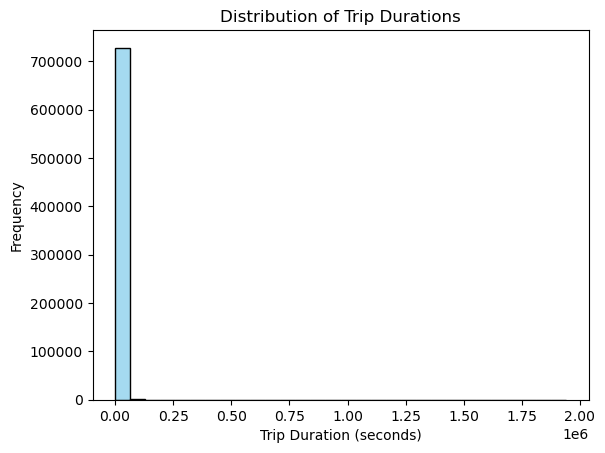

In [11]:
# Plotting Histogram
sns.histplot(x = 'trip_duration', data = df, bins=30, kde=False, color='skyblue')

# Adding Labels
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()

### Aggregating the Dataframe

### Explanation of the Code

1. **Adding New Features:**
   ```python
   df['pickup_hour'] = df['pickup_datetime'].dt.hour
   df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek + 1
   ```
   - **`df['pickup_datetime'].dt.hour`:** This extracts the hour component from the 'pickup_datetime' column using the `dt.hour` accessor. It creates a new column called 'pickup_hour' containing the hour of the day when the trip occurred.

   - **`df['pickup_datetime'].dt.dayofweek + 1`:** This extracts the day of the week from the 'pickup_datetime' column using the `dt.dayofweek` accessor. The addition of 1 is done to match the numbering convention where Monday is 1 and Sunday is 7. The result is stored in a new column called 'pickup_dayofweek'.

<br>

2. **Aggregating and Summarizing Data:**
   ```python
   avg_duration_by_hour = df.groupby("pickup_hour")["trip_duration"].mean().reset_index()
   avg_duration_by_day = df.groupby("pickup_dayofweek")["trip_duration"].mean().reset_index()
   ```
   - **`df.groupby("pickup_hour")["trip_duration"].mean()`:** This groups the DataFrame by the 'pickup_hour' column and calculates the mean of the 'trip_duration' for each group. The result is a new DataFrame, `avg_duration_by_hour`, containing the average trip duration for each hour.

   - **`df.groupby("pickup_dayofweek")["trip_duration"].mean()`:** This groups the DataFrame by the 'pickup_dayofweek' column and calculates the mean of the 'trip_duration' for each day of the week. The result is a new DataFrame, `avg_duration_by_day`, containing the average trip duration for each day of the week.

   - **`reset_index()`:** This function is used to reset the index of the resulting DataFrames, making 'pickup_hour' and 'pickup_dayofweek' regular columns.
   
 #### **February 2016 Calender to Match day of week**
 
 <img src="https://www.calendarpedia.com/images-large/months/2016/february-2016-calendar.png" height="100" width = "200">

In [12]:
# Adding new features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek + 1  # Adding 1 to match with PySpark's dayofweek function

# Aggregating and summarizing data
avg_duration_by_hour = df.groupby("pickup_hour")["trip_duration"].mean().reset_index()
avg_duration_by_day = df.groupby("pickup_dayofweek")["trip_duration"].mean().reset_index()

# Printing Columns one by one to understand code

print("Original Column Pickup Datetime is:\n")
print(df['pickup_datetime'].head())

print("\nColumn Pickup Hour is:\n")
print(df['pickup_hour'].head())

print("\nColumn Pickup Day of Week is:\n")
print(df['pickup_dayofweek'].head())

print("\nOriginal Column Trip Duration is:\n")
print(df['trip_duration'].head())

print("\nDataframe avg_duration_by_hour is:\n")
print(avg_duration_by_hour.head())

print("\nColumn avg_duration_by_day is:\n")
print(avg_duration_by_day.head(n = 7))

Original Column Pickup Datetime is:

0   2016-02-29 16:40:21
1   2016-03-11 23:35:37
2   2016-02-21 17:59:33
3   2016-01-05 09:44:31
4   2016-02-17 06:42:23
Name: pickup_datetime, dtype: datetime64[ns]

Column Pickup Hour is:

0    16
1    23
2    17
3     9
4     6
Name: pickup_hour, dtype: int64

Column Pickup Day of Week is:

0    1
1    5
2    7
3    2
4    3
Name: pickup_dayofweek, dtype: int64

Original Column Trip Duration is:

0     400
1    1100
2    1635
3    1141
4     848
Name: trip_duration, dtype: int64

Dataframe avg_duration_by_hour is:

   pickup_hour  trip_duration
0            0     963.991095
1            1     917.723692
2            2     887.775860
3            3     914.962299
4            4     895.426217

Column avg_duration_by_day is:

   pickup_dayofweek  trip_duration
0                 1     893.184555
1                 2     980.550279
2                 3     975.899557
3                 4    1005.446929
4                 5     990.022999
5                

### Plotting Line plot of Average Trip duration by hour

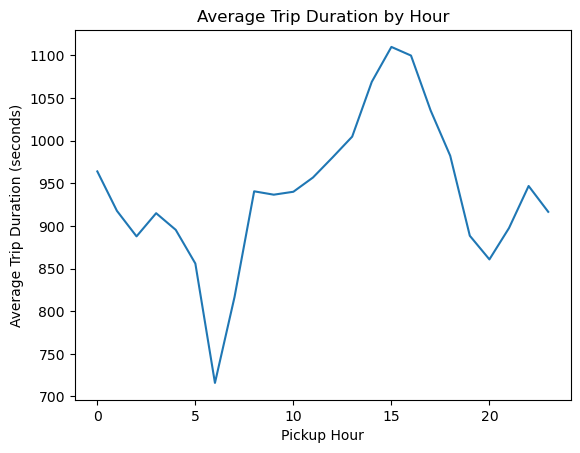

In [13]:
# Plotting average trip duration by hour
sns.lineplot(x='pickup_hour', y='trip_duration', data=avg_duration_by_hour)
plt.xlabel("Pickup Hour")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Hour")
plt.show()

### Plotting Line plot of Average Trip duration by Day of Week

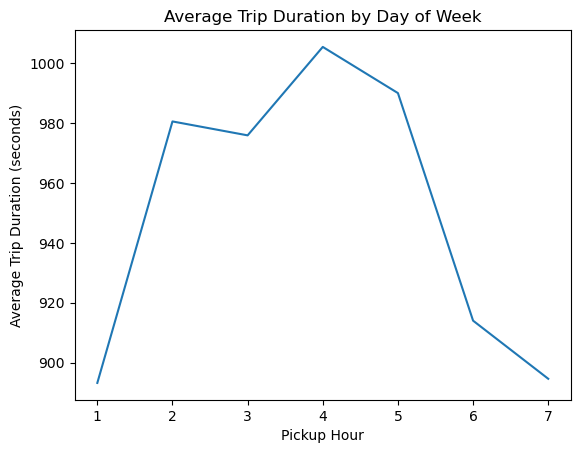

In [14]:
# Plotting average trip duration by hour
sns.lineplot(x='pickup_dayofweek', y='trip_duration', data=avg_duration_by_day)
plt.xlabel("Pickup Hour")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Day of Week")
plt.show()

### Reducing Dataset

In [18]:
number_of_rows = df.shape[0]

print("Number of Rows in Dataset are:", df.shape[0])

# Reducing to 1/5 of actual rows
reduced_number = df.shape[0] // 5
df = df.head(n = reduced_number)

# Saving this as CSV file
df.to_csv("New York Taxi Trip Duration Reduced Preprocessed.csv")

Number of Rows in Dataset are: 182330
